<center>
<img src="https://tensorflowkorea.files.wordpress.com/2020/12/4.-e18492e185a9e186abe1848ce185a1-e18480e185a9e186bce18487e185aee18492e185a1e18482e185b3e186ab-e18486e185a5e18489e185b5e186abe18485e185a5e18482e185b5e186bce18483e185b5e186b8e18485e185a5e.png?w=972" width="200" height="200"><br>
</center>

## 04-2 확률적 경사 하강법

### - 점진적인 학습

이번에 배울 내용은 훈련데이터가 조금씩 전달된다는 가정하에 시작하겠다. 조금씩 전달된 새로운 데이터를 기존의 훈련 데이터에 계속 추가하여 모델을 매일매일 훈련하면 어떨까? 나쁘지 않은 방법이다. 하지만 매일 추가되는 새로운 데이터를 활용해 모델을 훈련하면 데이터가 계속 늘어난다. 몇달이 지나면 모델을 훈련하기 위해 서버를 늘려야 한다. 이것은 지속 가능한 방법은 아니다.
다른 방법은 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지하는 것이다. 이렇게 하면 데이터셋의 크기가 너무 커지지 않을 수 있다. 하지만 데이터를 버릴 때 다른 데이터에 없는 중요한 생선 데이터가 포함되어 있으면 큰일이다. 
앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 훈련하는 방식을 점진적 학습이라고 한다. 대표적인 점진적 학습 알고리즘은 확률적 경사 하강법이다. 사이킷런에서 확률적 경사 하강법을 위한 클래스를 제공한다.

### - 확률적 경사 하강법

확률적 경사 하강법에서 확률적이란 말은 '무작위' 혹은 '랜덤하게'의 기술적 표현이다. 경사는 기울기를 얘기하고 하강법은 내려가는 방법이다. 산에서 내려온다 가정해보면 집으로 가기위해 등산로 입구까지 내려가야 한다. 가장 빠른길은 경사가 가장 가파른 길이다. 경사 하강법이 바로 이런 방식이다. 가장 가파른 경사를 따라 원하는 지점에 도달하는 것이 목표이다. 하지만 다리가 길어 한번에 걸음이 너무 크면 경사를 따라 내려가지 못하고, 오히려 올라갈 수 있다.

실제로 산에서 내려올 때는 천천히 조금씩 내려와야 한다. 경사 하강법은 가장 가파른 길을 찾아 내려오지만 조금씩 내려오는 것이 중요하다. 이렇게 내려오는 과정이 바로 경사 하강법 모델을 훈련하는 것이다.

이번엔 확률적이란 말을 이해해보자. 경사 하강법으로 내려올 때 가장 가파른 길을 찾는 방법은 무엇일까? 훈련 세트를 사용해 모델을 훈련하기 때문에 경사 하강법도 당연히 훈련 세트를 사용하여 가장 가파른 길을 찾을 것이다. 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 가파른 길을 찾는다. 이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로 확률적 경사 하강법이다.

모든 샘플을 다 사용하면 다시 처음부터 시작한다. 훈련 세트에 모든 샘플을 다시 채워 넣는다. 그다음 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려간다. 이렇게 만족할 위치에 도달할 때까지 계속 내려가면 된다. 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 에포트(epoch) 라고 부른다. 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행한다.

그리고 여러개의 샘플을 사용해 경사 하강법을 수행하는 방식을 미치배치 경사 하강법이라고 한다. 또한 극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수도 있다. 이를 배치 경사 하강법 이라고 부른다. 사실 전체 데이터를 사용하기 때문에 가장 안정적인 방법이다. 하지만 전체 데이터를 사용하면 그만큼 컴퓨터 자원을 많이 사용하게 된다. 어떤 경우는 데이터가 너무많아 한번에 전체 데이터를 모두 읽을수 없을지도 모른다. 확률적 경사 하강법은 훈련 세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동하는 알고리즘이다.
이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트되어도 학습을 계속 이어나갈 수 있다. 즉 다시 산꼭대기에서부터 시작할 필요가 없다.

하지만 어디서 내려가야 하는 걸까? 다시 말해 가장 빠른 길을 찾아 내려가려고 하는 이 산은 도대체 무엇일까? 이 산을 손실 함수라 부른다.

### - 손실 함수

손실 함수(loss function)는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다. 그렇다면 손실함수는 값이 작을수록 좋다. 하지만 어떤 값이 최솟값인지는 모른다. 가능한 많이 찾아보고 만족할 만한 수준이라면 산을 다 내려왔다고 인정해야 한다. 이 값을 찾아 조금씩 이동하려면 확률적 경사 하강법이 잘 맞을듯 하다. 다행히 우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어 있다.
그럼 생선을 분류하기 위해서는 어떤 손실 함수를 사용하는지 알아보자.

분류에서 손실은 아주 확실하다. 정답을 못 맞히는 것이다. 이진 분류를 예를 들어보면 도미는 1, 빙어는 0이다. 만약 4개의 예측 중 2개만 맞았으면 정확도는 1/2 = 0.5 이다. 하지만 정확도에 치명적인 단점은 4개의 샘플만 있다는 가정하에 가능한 정확도는 0, 0.25, 0.5, 0.75, 1 다섯가지 뿐이다. 앞서 경사 하강법을 사용할 때 아주 조금씩 내려온다고 했었다. 하지만 정확도가 이렇게 듬성듬성하면 경사 하강법을 이용해 조금씩 내려올 수 없다. 경사면은 확실히 연속적이어야 한다.

앞서 로지스틱 회귀에서 로지스틱 회귀 모델이 확률을 출력했었다. 예측은 0 또는 1이지만 확률은 0 ~ 1 사이의 어떤 값도 될 수 있다. 즉 연속적이다. 예를 들어 위의 샘플 4개의 예측 확률을 각각 0.9, 0.3, 0.2, 0.8 이라고 가정해보자. 첫 번째 샘플부터 하나씩 어떻게 손실 함수를 만들 수 있는지 살펴보자.

### - 로지스틱 손실 함수

첫 번째 샘플의 예측은 0.9 이므로 양성 클래스의 타겟인 1과 곱한 다음 음수로 바꿀 수 있다. 이 경우 예측이 1에 가까울수록 좋은 모델이다.
예측이 1에 가까울수록 예측과 타깃의 곱의 음수는 점점 작아진다. 이 값을 손실 함수로 사용해도 괜찮을 것이다.

두 번째 샘플의 예측은 0.3 이다. 타깃이 양성클래스인데 거리가 멀다. 위처럼 예측과 타깃을 곱해 음수로 바꾸면 -0.3 이 되기 때문에 확실히 첫 번째 샘플보다 높은 손실이 된다.

세 번째 샘플의 타깃은 음성 클래스라 0이다. 이 값을 예측 확률은 0.2와 곱하면 무조건 0이 되기 때문에 곱해서는 안된다. 한 가지 방법은 타깃을 마치 양성 클래스처럼 바꾸어 1로 만드는 것이다. 대신 예측값도 양성 클래스에 대한 예측으로 바꾼다. 즉 1-0.2 = 0.8로 사용한다. 그리고 곱하고 음수로 바꾸는 것은 동일하다. -0.8은 꽤 낮은 손실이다.

네 번째 샘플도 위와 같이 바꾸면 -0.2가 된다.손실이 높다. 예측 확률을 사용해 이런 방식으로 계산하면 연속적인 손실 함수를 얻을 수 있을 것이다. 여기서 예측 확률에 로그 함수를 적용하면 더 좋다. 예측 확률의 범위는 0 ~ 1 사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 된다. 손실이 양수가 되면 이해하기 더 쉽다. 또 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 때문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다.

양성 클래스일 때 손실은 -log(예측 확률) 로 계산한다. 확률이 1에서 멀어질 수록 손실은 아주 큰 양수가 된다. 음성 클래스 일 때 손실은 -log(1-예측 확률)로 계산한다. 이 예측이 0에 에서 멀어질수록 손실은 아주 큰 양수가 된다.

이 손실 함수를 로지스틱 손실 함수라고 부른다. 또는 이진 크로스엔트로피 손실 함수라고도 부른다.

여기에선 이진 분류를 예를 들었지만 다중 분류도 매우 비슷한 손실 함수를 사용한다. 다중 분류에서 사용하는 손실 함수를 크로스엔트로피 손실 함수라고 부른다. 이진 분류는 로지스틱 손실 함수를 사용하고 다중 분류는 크로스엔트로피 손실 함수를 사용한다.

### - SGDClassfier

이번에도 fish_csv_data 파일에서 판다스 데이터프레임을 만들어 보자.

In [3]:
import pandas as pd
fish = pd.read_csv('/home/jaeyoon89/hg-mldl/fish.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


그 다음 Species 열을 제외한 나머지는 입력 데이터로 사용한다. Species 열은 타겟 데이터이다.

In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

이 데이터를 훈련 세트와 테스트 세트로 나눈다.

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

이제 훈련 세트와 테스트 세트의 특성을 표준화 전처리한다. 훈련 세트에서 학습한 통계 값으로 테스트 세트도 꼭 변환해야 한다.

In [6]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

사이킷런에서 확률적 경사 하강법을 제공하는 대표적은 분류용 클래스는 SGDClassifier이다. 아래 처럼 임포트 해보자.

In [7]:
from sklearn.linear_model import SGDClassifier

SGDClassifier의 객체를 만들 때 2개의 매개변수를 지정한다. loss는 손실 함수의 종류를 지정한다. 여기에서 loss='log'로 지정하여 로지스틱 손실 함수를 지정했다. max_iter는 수행할 에포크 횟수를 지정한다. 10으로 지정하여 전체 훈련 세트를 10으로 반복하자. 그다음 훈련 세트와 테스트 세트에서 정확도 점수를 출력해보자.

In [11]:
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/home/jaeyoon89/.local/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


출력된 훈련 세트와 테스트 세트 정확도가 낮다. 지정한 반복횟수 10번이 부족한 것 같다.

앞서 이야기한 것처럼 확률적 경사 하강법은 점진적 학습이 가능하다. SGDClassifier 객체를 다시 만들지 않고 훈련한 모델 sc를 추가로 더 훈련해 보자. 모델을 이어서 훈련할 때는 partial_fit() 메서드를 사용한다.

In [12]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.825


아직 점수가 낮지만 에포크를 한 번 더 실행하니 정확도가 향상 되었다. 이 모델을 여러 에포크에서 더 훈련해 볼 필요가 있다. 얼마나 더 해야할까? 어떤 기준이 필요할 것 같다.

### - 에포크와 과대/과소 적합

확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.
에포크의 횟수가 적으면 모델이 훈련 세트를 덜 학습한다. 반대로 에포크의 횟수가 충분히 많으면 훈련 세트를 완전히 학습할 것이다.
즉 적은 에포크 횟수 동안에 훈련한 모델은 훈련 세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다.
반대로 많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다.

과대적합이 시작하기 전에 훈련을 멈추는 것을 조기 종료라고 한다. 우리가 준비한 데이터 셋으로 그래프를 만들어 보자.

이번엔 fit() 메서드를 사용하지 않고 partial_fit() 메서드만 사용하자. 그러려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit() 메서드에 전달해 주어야 한다. 이를 위해 np.unique() 함수로 train_target에 있는 7개 생선의 목록을 만든다. 또 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비하자.

In [14]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

300번의 에포크 동안 훈련을 반복하여 진행해 보자. 반복마다 훈련 세트와 테스트 세트의 점수를 계산하여 train_score, test_score 리스트에 추가한다.

In [15]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

300번의 에포크 동안 기록한 훈련 세트와 테스트 세트의 점수를 그래프로 그려보자.

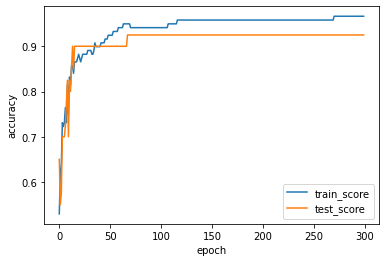

In [18]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_score','test_score'])
plt.show()

데이터가 작기 때문에 아주 잘 드러나지는 않지만, 백 번째 에포크 이후에는 훈련 세트와 테스트 세트의 점수가 조금씩 벌어지고 있다. 또 확실히 에포크 초기에는 과소적합되어 훈련 세트와 테스트 세트의 점수가 낮다. 이 모델의 경우 백 번째 에포크가 적절한 반복 횟수로 보인다.

반복 횟수를 100으로 맞추고 다시 훈련 보자.

In [19]:
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다. tol 매개변수에서 향상될 최솟값을 지정한다. 앞의 코드에서는 tol 매개변수를 None으로 지정하여 자동으로 멈추지 않고 max_iter=100 만큼 부조건 반복하게 하였다. 
훈련 세트와 테스트 세트에서의 점수가 비교적 높게 나왔다.

SGDClassifer의 매개변수에 대해 조금 알아보면 사실 loss 매개변수의 기본값은 'hinge'이다. 힌지 손실은 서포트 벡터 머신이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다. 여러종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다.
간단한 예로 힌지 손실을 사용해 같은 반복 횟수 동안 모델을 훈련해 보자.

In [20]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


출처 : 혼자 공부하는 머신러닝+딥러닝